### workflow examples for memo_py

Possible example workflows of the framework are outlined below. The workflows are categorised into the sections

- A Networks and Simulations
    - A1 define a network
    - A2 simulate a network by the Gillespie algorithm
    - A3 simulate a network by the moment-based algorithm
- B Data handling
    - B1 load mean, variance and covariance data
    - B2 create *in silico* count data and transform to mean, variance and covariance (including bootstrapping)
- C Parameter and Model Evidence Estimation
    - C1 fit a model to example data (the model to its own in silico data)
    - C2 fit a selection of models to the *in silico* data
    - C3 fit a selection of models to the example data
- D Event times analysis
    - TODO: add here; simplify plotting interface

to explain the different functionalities of this framework.

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


#### A Networks and Simulations

#### A1 define a network

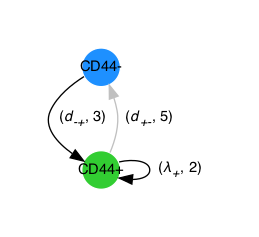

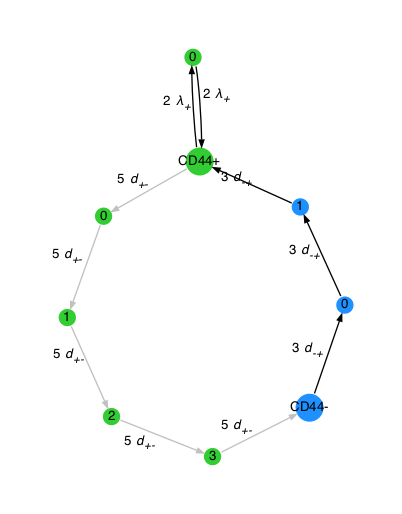

In [2]:
### input
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 3},
        {'start': 'A_t', 'end': 'M_t', 'rate_symbol': 'd_am', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 2}
        ]

### computation
net = me.Network('net_1')
net.structure(topology_1)

### plot the network (main and hidden layer)
# NOTE: html scripted labels can be used for text formatting
node_settings = {
    'A_t': {'label': 'CD44+', 'color': 'limegreen'},
    'M_t': {'label': 'CD44-', 'color': 'dodgerblue'}
}

# empty string ('') to not show label
# None or 'some color' to set color (default='grey35')
edge_settings = {
    'd_ma': {'label': '<I>d<sub>-+</sub></I>', 'color': None}, # < <I>d<sub>-+</sub></I> >
    'd_am': {'label': '<I>d<sub>+-</sub></I>', 'color': 'grey'},
    'la_a': {'label': '<I>&lambda;<sub>+</sub></I>', 'color': None}
}

me.plots.net_main_plot(net, node_settings=node_settings, edge_settings=edge_settings)
me.plots.net_hidden_plot(net, node_settings=node_settings, edge_settings=edge_settings)

#### A2 simulate a network by the Gillespie algorithm

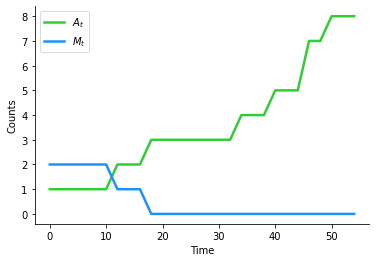

In [8]:
### input
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]


initial_values = {'M_t': 2, 'A_t': 1}
theta_values = {'la_a': 0.06, 'd_ma': 0.04}
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True)
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

### computation
net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('gillespie', initial_values, theta_values, time_values, variables)

### plotting
settings = {
    'A_t': {'label': '$A_t$', 'color': 'limegreen'},
    'M_t': {'label': '$M_t$', 'color': 'dodgerblue'}
}

me.plots.sim_counts_plot(sim, settings=settings) # , settings=settings

#### A3 simulate a network by the moment-based algorithm

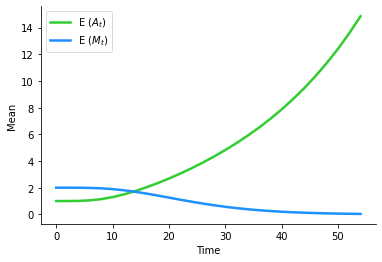

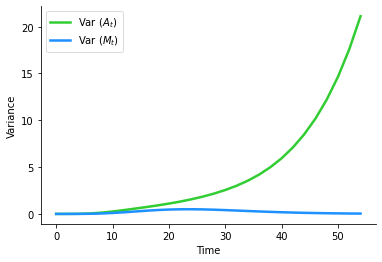

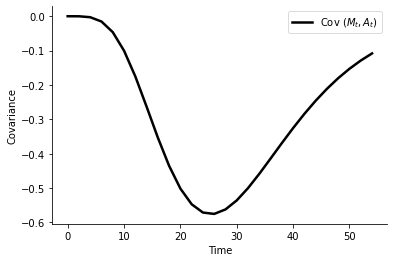

In [5]:
### computation
sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_mean_plot(sim, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_variance_plot(sim, settings=settings)

# cov
settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.sim_covariance_plot(sim, settings=settings)

#### A4 derive the symbolic moment equations for a defined network

#### B Data handling

#### B1 load mean, variance and covariance data

count_data_cd44_manual_counting_18_01_14_filtered


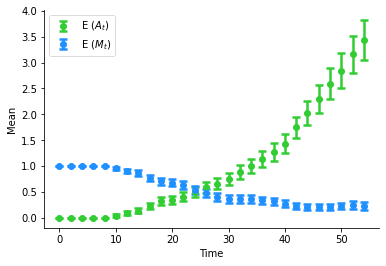

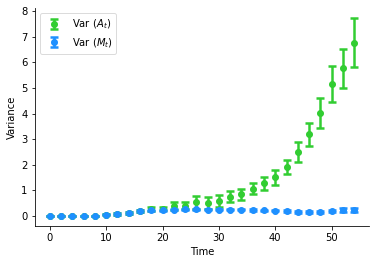

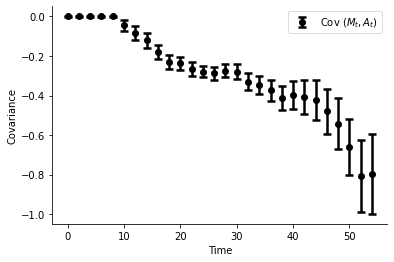

In [6]:
### load predefined data set with pickle
# count_data_cd44_manual_counting_18_01_14_filtered
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered.pickle', 'rb'))
print(data.data_name)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)


In [7]:
print(data.data_mean[1, :, :])
print(data.data_variance[1, :, :])
print(data.data_covariance[1, :, :])

[[0.001      0.001      0.001      0.001      0.001      0.031453
  0.04340501 0.05167448 0.06317291 0.0771729  0.07817533 0.09276039
  0.09354182 0.10810918 0.10618146 0.11198674 0.12976338 0.13560213
  0.15342987 0.16823561 0.18334817 0.20529588 0.23497553 0.26608806
  0.29885444 0.33790002 0.3583498  0.38582198]
 [0.001      0.001      0.001      0.001      0.001      0.03142774
  0.04322882 0.05168888 0.06308246 0.06875952 0.07022969 0.07253398
  0.07513979 0.0753603  0.07443435 0.07241361 0.07282207 0.07263776
  0.07142333 0.07011769 0.06710319 0.06299646 0.06095351 0.06076622
  0.0607317  0.06322702 0.07280397 0.07082058]]
[[0.001      0.001      0.001      0.001      0.001      0.02866057
  0.03547979 0.03776581 0.03491499 0.06474123 0.06179268 0.1467302
  0.13580757 0.25503548 0.24673574 0.23609492 0.21958438 0.20346645
  0.21486194 0.24198948 0.28238328 0.27425167 0.39159952 0.44538279
  0.58747686 0.70793561 0.77170019 0.95944562]
 [0.001      0.001      0.001      0.001     

In [92]:
# ### thin out data
# print(data.data_counts.shape)
# print(np.linspace(0.0, 54.0, num=4, endpoint=True))
# # 0, 9, 18, 27
# data_counts_thin = data.data_counts[:, :, (0, 9, 18, 27)]
# print(data_counts_thin.shape)

(44, 2, 28)
[ 0. 18. 36. 54.]
(44, 2, 4)


In [4]:
### remove data points that require "basic sigma"
data_counts_no_sigma = data.data_counts[:, :, (0, ) + tuple(range(5, 28))]
print(np.linspace(0.0, 54.0, num=28, endpoint=True)[[0] + list(range(5, 28))])
print((0, ) + tuple(range(5, 28)))
print(data_counts_no_sigma.shape)
print(len(np.linspace(0.0, 54.0, num=28, endpoint=True)))
np.linspace(0.0, 54.0, num=28, endpoint=True)[[0, 1]]

[ 0. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34. 36. 38. 40. 42.
 44. 46. 48. 50. 52. 54.]
(0, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)
(44, 2, 24)
28


array([0., 2.])

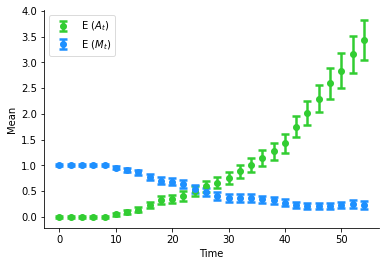

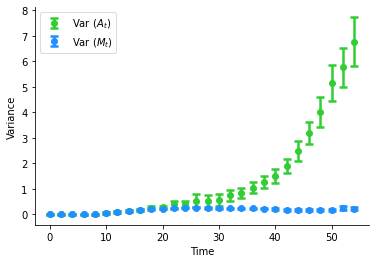

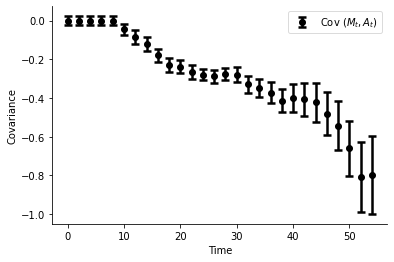

In [5]:
### creation of a new data object
# count_data_cd44_manual_counting_18_01_14_filtered_thin4
# count_data_cd44_manual_counting_18_01_14_filtered_nosigma
data_name = 'count_data_cd44_manual_counting_18_01_14_filtered_sigma022'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': np.linspace(0.0, 54.0, num=28, endpoint=True), # [[0] + list(range(5, 26))], 
    # np.linspace(0.0, 54.0, num=4, endpoint=True), # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': data.data_counts, # data.data_counts[:, :, (0,) + tuple(range(5, 26))], # data_counts_thin # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 100000, # 10000 (testing), 100000 (important)
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.022 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

In [6]:
print(data.data_mean[1, :, :])
print(data.data_variance[1, :, :])
print(data.data_covariance[1, :, :])

[[0.022      0.022      0.022      0.022      0.022      0.0314755
  0.04341954 0.05166906 0.06318814 0.07716476 0.07835066 0.09276841
  0.09370514 0.10798187 0.10618028 0.11222449 0.12878529 0.13607242
  0.1527822  0.16827715 0.1831531  0.20714083 0.23552106 0.26483295
  0.29884436 0.33859078 0.35779398 0.38693812]
 [0.022      0.022      0.022      0.022      0.022      0.03132231
  0.04307491 0.05162441 0.06299179 0.06873421 0.07063751 0.07267862
  0.07513054 0.07547654 0.07402824 0.07267571 0.07236755 0.07223151
  0.07151303 0.0703941  0.06734392 0.06323685 0.06081107 0.06079109
  0.06055157 0.06320657 0.07269597 0.07082512]]
[[0.022      0.022      0.022      0.022      0.022      0.02862144
  0.03557913 0.03781346 0.03492967 0.0643255  0.06187101 0.14620925
  0.13507182 0.25475022 0.24660565 0.23730268 0.21963596 0.20375411
  0.21538818 0.24138524 0.28230799 0.27390116 0.39084073 0.44497891
  0.58366753 0.71141674 0.77532093 0.96337943]
 [0.022      0.022      0.022      0.022   

In [7]:
### store python object of the in silico data with pickle
print(data.data_name)
with open('count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'wb') as file_:
    pickle.dump(data, file_)

count_data_cd44_manual_counting_18_01_14_filtered_sigma022


#### B2 load count data and transform to mean, variance and covariance (including bootstrapping)

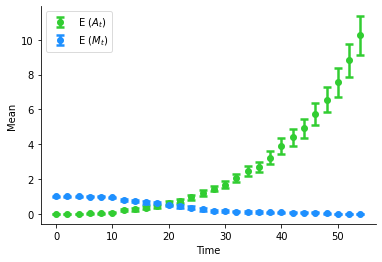

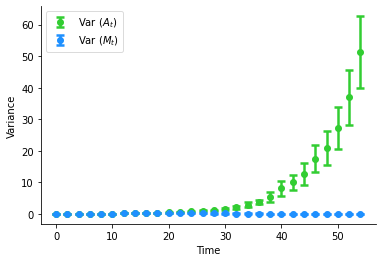

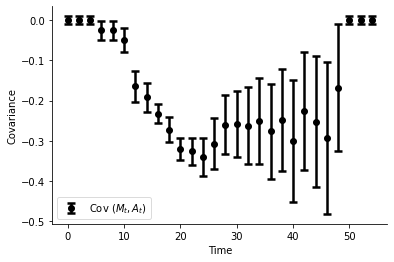

In [8]:
### run simulations to obtain in silico counts
num_iter = 40 # 40, 1000

topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'M_t': 1, 'A_t': 0}
theta_values = {'la_a': 0.100, 'd_ma': 0.050} # 0.060, 0.030 OR 0.100, 0.050
time_values = np.linspace(0.0, 54.0, num=28, endpoint=True) # num=28, num=4, num=2
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res_list = list()

for __ in range(num_iter):
    res_list.append(sim.simulate('gillespie', initial_values, theta_values, time_values, variables)[1])

in_silico_counts = np.array(res_list)

### creation of a new data object
data_name = 'in_silico_data_cd44_highcell_full'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': time_values, # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': in_silico_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.01 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

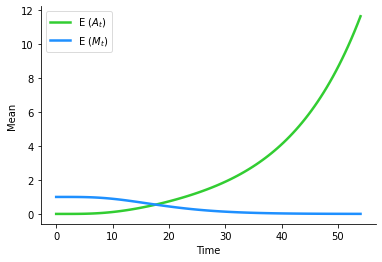

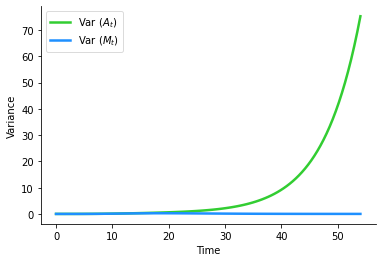

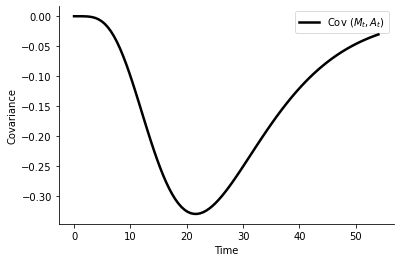

In [9]:
### compare to exact moments
topology_1 = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': 5},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': 5}
        ]

initial_values = {'M_t': 1.0, 'A_t': 0.0}
theta_values = {'la_a': 0.100, 'd_ma': 0.050} # 0.060, 0.030 OR 0.100, 0.030
time_values = np.linspace(0.0, 54.0, num=100, endpoint=True) # num=28
variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

net = me.Network('net_1')
net.structure(topology_1)

sim = me.Simulation(net)
res = sim.simulate('moments', initial_values, theta_values, time_values, variables)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_mean_plot(sim, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.sim_variance_plot(sim, settings=settings)

# cov
settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.sim_covariance_plot(sim, settings=settings)

In [11]:
### store python object of the in silico data with pickle
print(data.data_name)
with open('in_silico_data_cd44_highcell_full.pickle', 'wb') as file_:
    pickle.dump(data, file_)

in_silico_data_cd44_highcell_full


#### B3 simulate moments of a network and load as *in silico* data

#### C Parameter and Model Evidence Estimation

#### C1 fit a model to example data (the model to its own *in silico* data)

In [6]:
### list of models (just one here)

def make_model(steps_d, steps_l):
    name = 'net_' + str(steps_d) + '_' + str(steps_l)
    
    topology = [
        {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': steps_d},
        {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': steps_l}
        ]
    
    setup = {'initial_values': {'M_t': 1.0, 'A_t': 0.0}, 'theta_bounds': {'d_ma': (0.0, 0.15), 'la_a': (0.0, 0.15)}, 'variables': {'M_t': ('M_t', ), 'A_t': ('A_t', )}}

    return (name, topology, setup)

list_models = [make_model(steps_d, steps_l) for steps_d in range(1, 7) for steps_l in range(1, 7)]
print(len(list_models))
# topology_1 = [
#         {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 8},
#         {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 8}
#         ]

# setup_1 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_2 = [
#         {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 5},
#         {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 5}
#         ]

# setup_2 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_3 = [
#        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 3},
#        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 3}
#        ]
# setup_3 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}

# topology_4 = [
#        {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd_01', 'type': 'S -> E', 'reaction_steps': 1},
#        {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1}
#        ]
# setup_4 = {'initial_values': {'X_t': 1.0, 'Y_t': 0.0}, 'theta_bounds': {'d_01': (0.0, 0.15), 'la_1': (0.0, 0.15)}, 'variables': {'X_t': ('X_t', ), 'Y_t': ('Y_t', )}}


# list_models = [
#     [('net_1'), (topology_1), (setup_1)],
#     [('net_2'), (topology_2), (setup_2)],
#     [('net_3'), (topology_3), (setup_3)],
#     [('net_4'), (topology_4), (setup_4)]
# ]


### load the in silico data from section B
data = pickle.load(open('in_silico_data_cd44_thin2.pickle', 'rb'))
print(data.data_name)


36
in_silico_data_cd44_thin2


In [7]:
### input for selection
d = {
# model set
'model_set': list_models,

# data/model settings
'data': data,
'mean_only': False, # True or False

# nested sampling settings
'nlive':                    1000, # 250 # 1000
'tolerance':                0.01, # 0.1 # 0.05 # 0.01
'bound':                    'multi',
'sample':                   'unif'
}

### computation, result is a list of Estimation class instances
res = me.select_models(d)


In [7]:
### computation, result is a list of Estimation class instances
res = me.select_models(d, parallel={'do':False})

In [8]:
### save in silico estimation with pickle
with open('cd44_count_data_thin_estimation.pickle', 'wb') as file_: # in_silico_estimation
    pickle.dump(res, file_)

In [2]:
### load in silico estimation with pickle
res = pickle.load(open('estimation_in_silico_data_cd44_highcell_full_sigmaremoved.pickle', 'rb')) # in_silico_estimation
# print(res)

In [3]:
### read out some evidence values for all models
# print('evidence (nested sampling)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_evidence, ' +/-', est_i.bay_est_log_evidence_error)
    
# print('\n', 'loglikelihood (max)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_likelihood_max)
    
# print('\n', 'BIC')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_bayesian_information_criterion)
    
# print('\n', 'evidence (based on BIC)')
# for est_i in res:
#     print(est_i.est_name, ': ', est_i.bay_est_log_evidence_from_bic)
    
# evidence (nested sampling)
# est_net_1 :  37.6242451084391  +/- 0.10515928674834563
# est_net_2 :  45.71825145984323  +/- 0.10784407463832914
# est_net_3 :  40.35798486888894  +/- 0.10814047482467853
# est_net_4 :  -8.462859561532408  +/- 0.10651058314121499

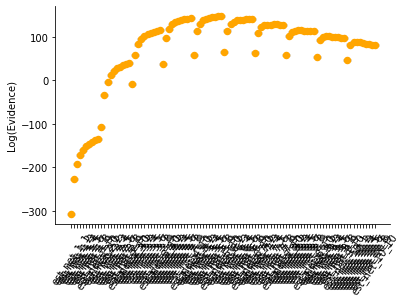

In [3]:
### log evidences of all models
model_selection = res

me.plots.selection_plot(model_selection, est_type='evidence')

(0.5, 20.0)

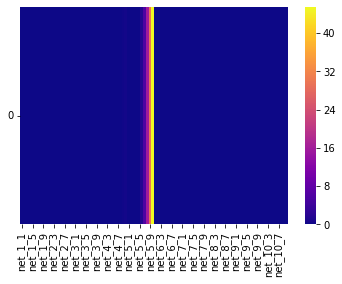

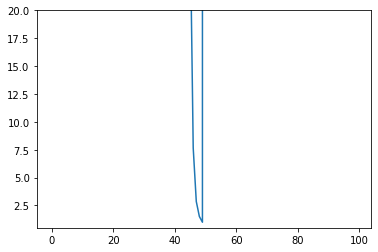

In [15]:
### calculate prob distr over all selected models
# probability for each model (assuming set of models is exhaustive and exclusive! see wiki maybe)
# calculation assumes uniform model prior, i.e. p(M)=1/n (n = number of models)
model_probs = me.selection.compute_model_probabilities(res)
# print(model_probs)

df = pd.DataFrame(np.array([model_probs]) * 100.0, columns=[est.net.net_name for est in res]) # , index=rows
sns.heatmap(df, cmap='plasma', annot=False, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')

# also possible: Bayes factors
model_bayes_factors = me.selection.compute_model_bayes_factors(res)
# print(model_bayes_factors)
plt.figure()
plt.plot(range(len(model_bayes_factors)), model_bayes_factors)
plt.ylim(0.5, 20.0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

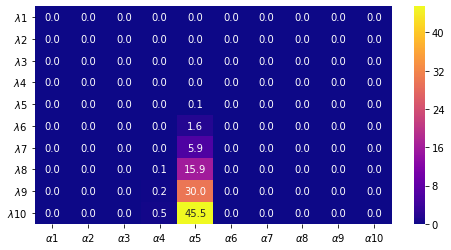

In [3]:
net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)

steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
# plt.savefig('./example_figures/map_model_probs.pdf')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

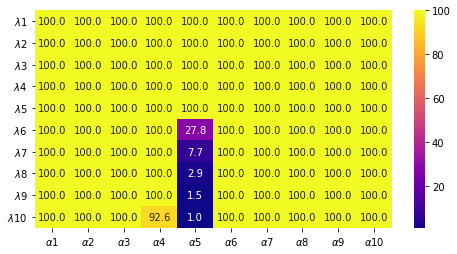

In [18]:
net_names = [est.net.net_name for est in res]
model_bf = me.selection.compute_model_bayes_factors(res)

steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_bf_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_bf_2d[i, j] = model_bf[net_index]


# cut-off
model_bf_2d[model_bf_2d > 100.0] = 100.0

df = pd.DataFrame(model_bf_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
# plt.savefig('./example_figures/map_model_bfs.pdf')

# from wiki:
# K         Strength of evidence
# 1 to 3.2  Not worth more than a bare mention
# 3.2 to 10 Substantial
# 10 to 100 Strong
# > 100     Decisive

In [20]:
net_names.index('net_5_10')

49

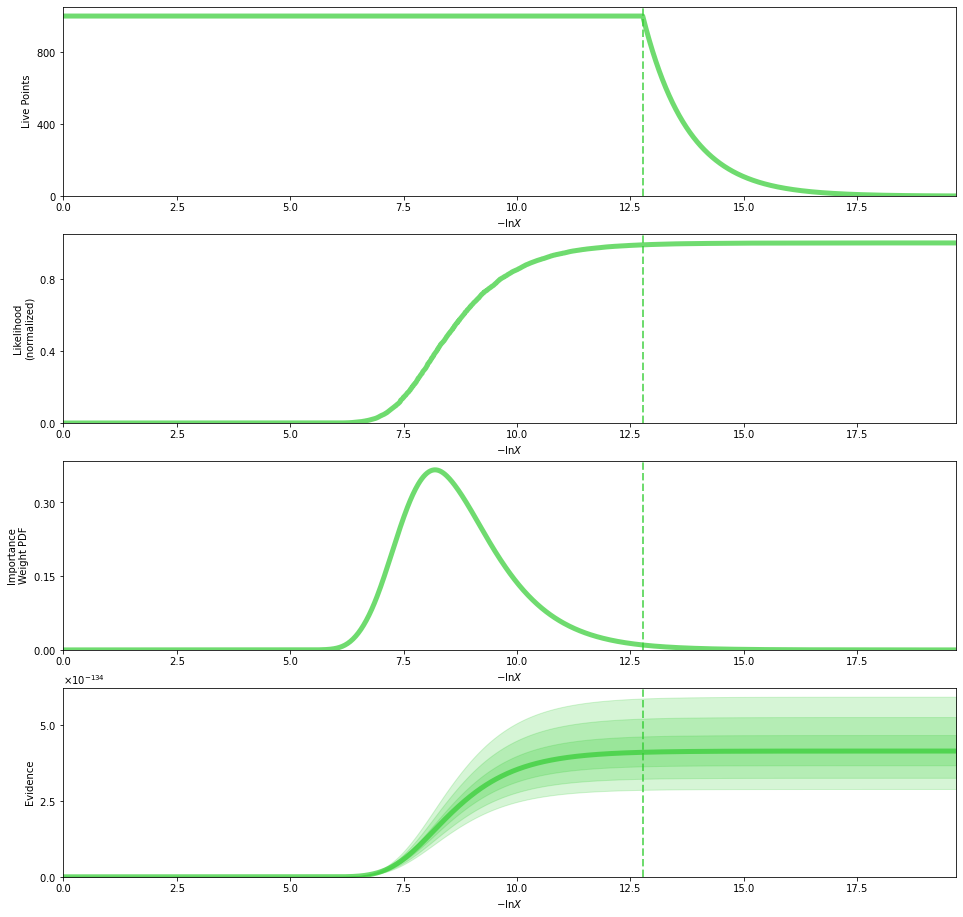

In [4]:
### runplot for an estimation result
est = res[0]
me.plots.est_runplot(est)

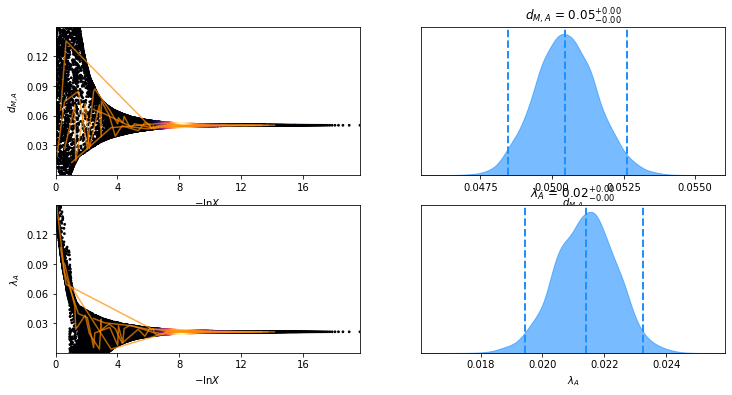

In [6]:
### traceplot for an estimation result
est = res[0]

# plot dynesty runplot
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_traceplot(est, settings=settings)

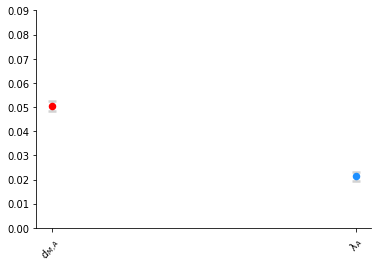

[0.05046398 0.0214205 ]


In [20]:
### plot one-dimensional parameter confidence bounds
est = res[0]

settings = {
    'la_a': {'label': '$\lambda_A$', 'color': 'dodgerblue'},
    'd_ma': {'label': '$d_{M,A}$', 'color': 'red'}
    }
me.plots.est_parameter_plot(est, settings=settings, y_lim=(0.0, 0.09))

### median and 95% confidence intervals of parameter estimates
print(est.bay_est_params_median)
# print(est.bay_est_params_conf)

### actual parameter samples
# print(est.bay_est_samples.shape)
# print(est.bay_est_samples)
# print(est.bay_est_samples_weighted)
# print(est.bay_est_weights)



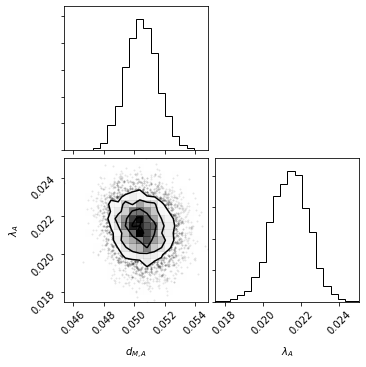

In [6]:
### corner plot
est = res[0]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_plot(est, settings=settings)

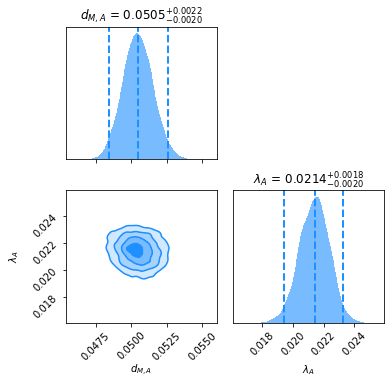

In [7]:
### corner kernel plot
est = res[0]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_kernel_plot(est, settings=settings)

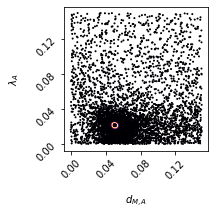

In [5]:
### corner weight plot
est = res[0]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_weight_plot(est, settings=settings)

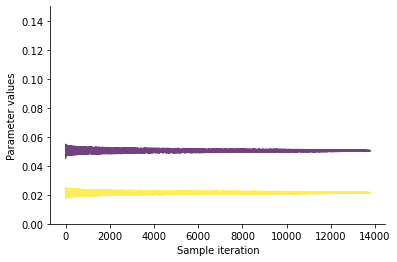

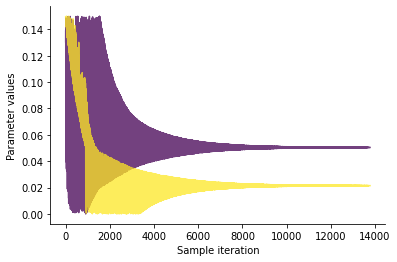

In [6]:
### parameter chains from nested sampling
est = res[0]
me.plots.est_chains_plot(est, y_lim=(0.0, 0.15))
me.plots.est_chains_plot(est, weighted=False)

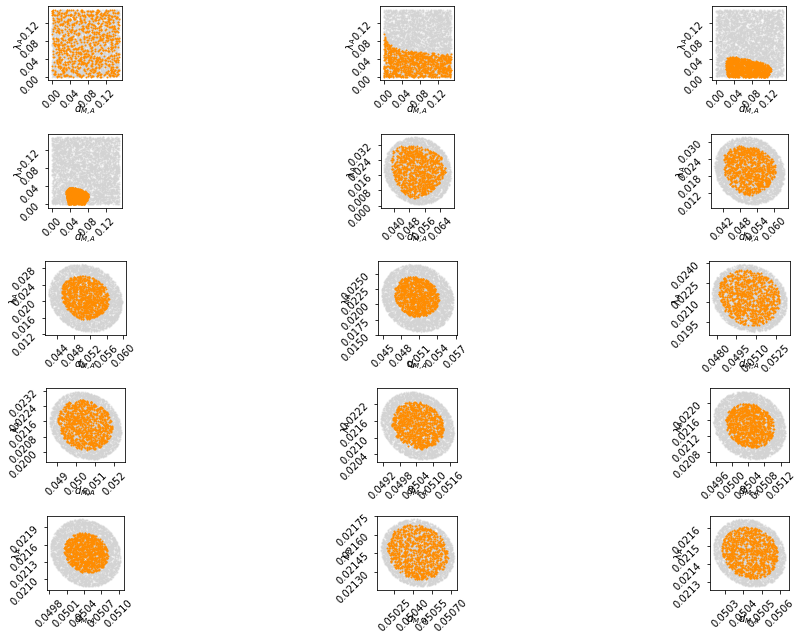

In [3]:
### cornerbounds plots
est = res[0]
settings = {
    'la_a': {'label': '$\lambda_A$'},
    'd_ma': {'label': '$d_{M,A}$'}
    }
me.plots.est_corner_bounds_plot(est, num_iter=15, settings=settings)

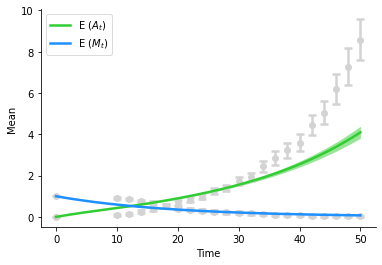

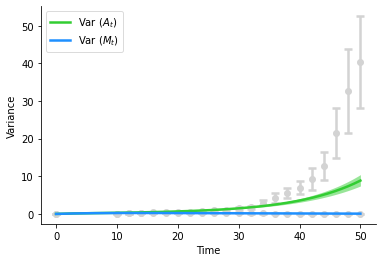

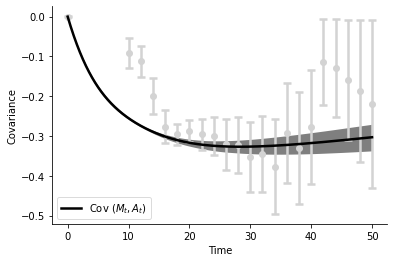

In [15]:
### best-fits model with options for data display and credible bands
est = res[4]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings)

#### C2 fit a selection of models to the *in silico* data

#### C3 fit a selection of models to the example data

#### D Event times analysis
TODO: add here; simplify plotting interface

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# load a data object
# can of course also be done with a data object from best-fit model simulations
data = pickle.load(open('count_data_cd44_manual_counting_18_01_14_filtered.pickle', 'rb'))
print(data.data_name)

count_data_cd44_manual_counting_18_01_14_filtered


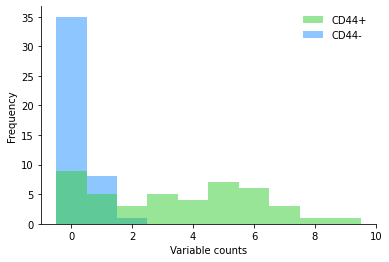

In [3]:
time_index = -1 # last time point
settings = {
    'M_t': {'label': 'CD44-', 'color': 'dodgerblue', 'opacity': 0.5},
    'A_t': {'label': 'CD44+', 'color': 'limegreen', 'opacity': 0.5}
    }
me.plots.data_hist_variables_plot(data, time_index, normalised=False, settings=settings)

gamma_fit_shape:  5.1969512447315545 
 gamma_fit_scale:  4.660703772893218


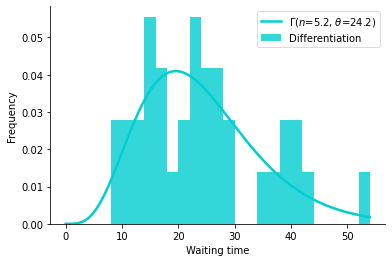

gamma_fit_shape:  2.6335745247278073 
 gamma_fit_scale:  5.0146246199814115


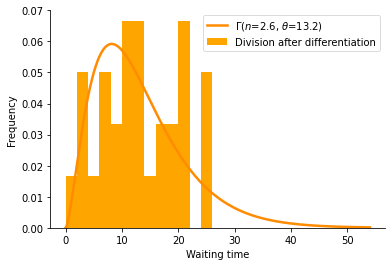

In [15]:
# compute the event analysis
data.events_find_all()

# plot selected event types
settings = {'label': 'Differentiation', 'color': 'darkturquoise', 'opacity': 0.8, 'gamma_color': 'darkturquoise'}
me.plots.data_hist_waiting_times_plot(data, data.event_all_first_cell_type_conversion, 
                                      settings=settings, gamma_fit=True, normalised=True)


settings = {'label': 'Division after differentiation', 'color': 'orange', 'opacity': 1.0, 'gamma_color': 'darkorange'}
me.plots.data_hist_waiting_times_plot(data, data.event_all_first_cell_count_increase_after_cell_type_conversion, 
                                      settings=settings, gamma_fit=True, normalised=False)

In [14]:
# overview readout of multiple event types
num_wells = data.data_counts.shape[0]
print(f'percentage wells with first_change_from_inital_conditions = {100 * round(sum([b for b, tau in data.event_all_first_change_from_inital_conditions])/num_wells, 3)}')
print(f'percentage wells with first_cell_count_increase = {100 * round(sum([b for b, tau in data.event_all_first_cell_count_increase])/num_wells, 3)}')
print(f'percentage wells with first_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_first_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with first_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_first_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')
print(f'percentage wells with third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion = {100 * round(sum([b for b, tau in data.event_all_third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion])/num_wells, 3)}')

print(f'one well percentage difference = {100 * round(1.0/num_wells, 3)}')

percentage wells with first_change_from_inital_conditions = 84.1
percentage wells with first_cell_count_increase = 70.5
percentage wells with first_cell_type_conversion = 81.8
percentage wells with first_cell_count_increase_after_cell_type_conversion = 68.2
percentage wells with second_cell_count_increase_after_first_cell_count_increase_after_cell_type_conversion = 61.4
percentage wells with third_cell_count_increase_after_first_and_second_cell_count_increase_after_cell_type_conversion = 45.5
one well percentage difference = 2.3


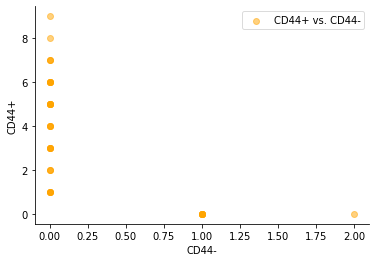

In [12]:
# various: small wrapper for a scatter plot of variable counts
variable1 = 'M_t'
variable2 = 'A_t'
time_ind = -1
settings = {'color': 'orange', 'opacity': 0.5, 'label': 'CD44+ vs. CD44-'}

me.plots.data_variable_scatter_plot(data, time_ind, variable1, variable2, 
                                    x_label='CD44-', y_label='CD44+', settings=settings)

#### E Various notes

In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import corner
%matplotlib inline

/Users/m651s/opt/anaconda3/envs/cd44_project/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [31]:
### load in silico estimation with pickle
res_min = pickle.load(open('estimation_count_data_cd44_filtered_thin4.pickle', 'rb')) # in_silico_estimation
# print(res)

min_model_net_names = [est.net.net_name for est in res_min]
min_model_model_probs = me.selection.compute_model_probabilities(res_min)
min_model_model_logevids = [est.bay_est_log_evidence for est in res_min]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

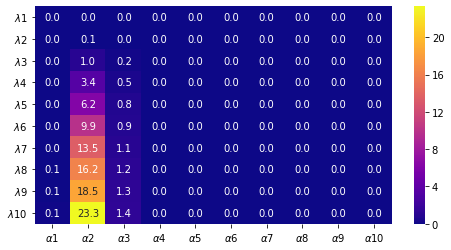

In [4]:
steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_probs_2d[i, j] = model_probs[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

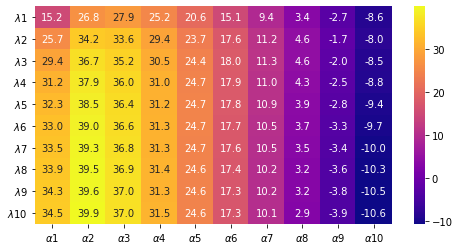

In [8]:
steps_list = range(1, 11)

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha{i}$' for i in steps_list]

model_logevids_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names.index(name)
        model_logevids_2d[i, j] = model_logevids[net_index]

df = pd.DataFrame(model_logevids_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')

In [5]:
net_names.index('net_2_10')

19

In [10]:
model_logevids[19]

39.862482254002536

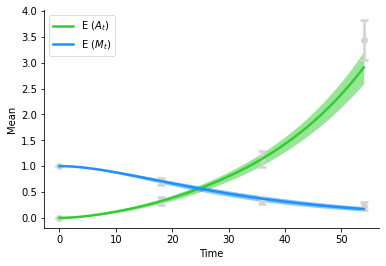

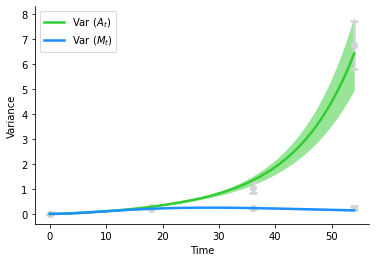

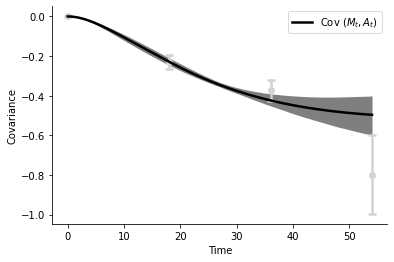

In [6]:
### best-fits model with options for data display and credible bands
est = res[19]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings)

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings)

In [66]:
### load in silico estimation with pickle
res = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par3.pickle', 'rb')) # in_silico_estimation
# print(res)

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
model_bfs = me.selection.compute_model_bayes_factors(res)
model_logevids = [est.bay_est_log_evidence for est in res]

In [67]:
print(model_logevids.index(max(model_logevids)))
max(model_logevids)

370


42.13480758579131

In [18]:
model_logevids[370]

42.13480758579131

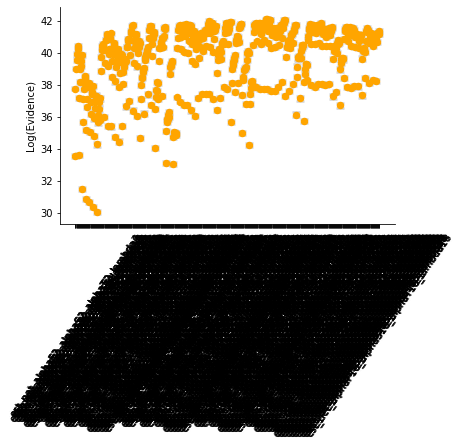

In [25]:
me.plots.selection_plot(res, est_type='evidence')

In [28]:
for name, logevid in zip(net_names, model_logevids):
    if logevid > 42.0:
        print(name, '\t',logevid)

net_alphaF6_alphaS6_alphaT14_lambda14 	 42.078268757135895
net_alphaF6_alphaS6_alphaT14_lambda18 	 42.13480758579131
net_alphaF6_alphaS6_alphaT18_lambda14 	 42.07068620414759
net_alphaF6_alphaS6_alphaT18_lambda18 	 42.02149160983367
net_alphaF6_alphaS8_alphaT18_lambda14 	 42.023850619426945
net_alphaF6_alphaS8_alphaT18_lambda18 	 42.06231989177437


In [83]:
# for name, bf in zip(net_names, model_bfs):
#     if bf < 3.2:
#         print(name, '\t', bf)

In [29]:
net_names.index('net_alphaF6_alphaS8_alphaT18_lambda18')

405

In [113]:
net_names.index('net_alphaF10_alphaS14_alphaT18_lambda8')

549

In [115]:
model_logevids[549]
model_bfs[549]

2.7611208131541294

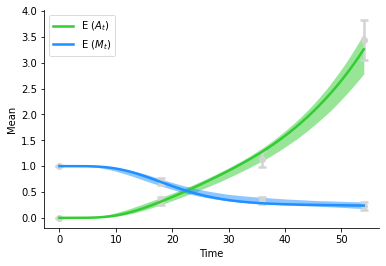

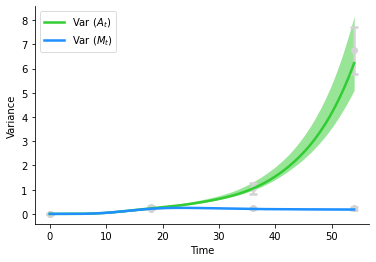

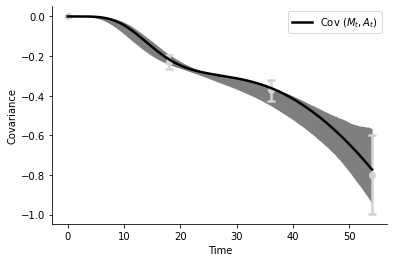

In [84]:
### best-fits model with options for data display and credible bands
est = res[405]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cov.pdf')

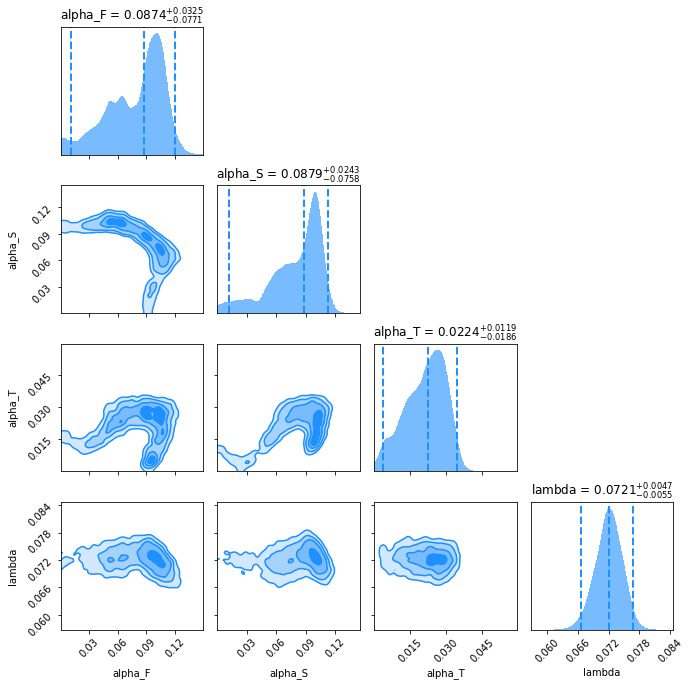

In [86]:
est = res[405]

me.plots.est_corner_kernel_plot(est, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cornerkernel.pdf')

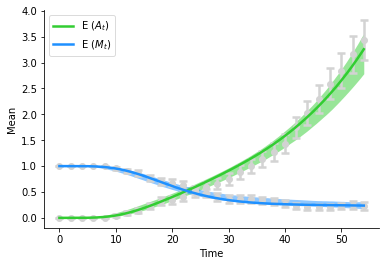

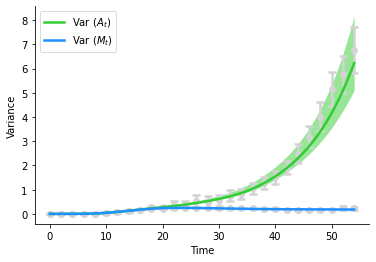

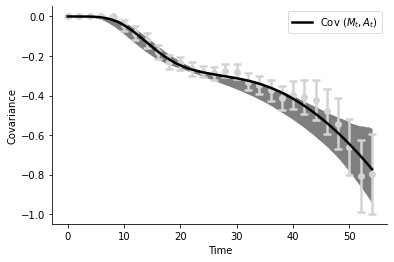

In [98]:
# a small hack to plot thin4 model on top of all data
import copy
est_hack = copy.deepcopy(res[405])
est_full_data = copy.deepcopy(res_full_data[549])
# overwrite data with data from full data estimation
est_hack.data = est_full_data.data
est_hack.data_time_values = est_full_data.data_time_values
est_hack.data_mean_values = est_full_data.data_mean_values
est_hack.data_var_values = est_full_data.data_var_values
est_hack.data_cov_values = est_full_data.data_cov_values
est_hack.data_num_values = est_full_data.data_num_values
est_hack.data_time_values_dense = est_full_data.data_time_values_dense

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_mean_hack.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_var_hack.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est_hack, data=True, conf=True, settings=settings, save='est_par3_thin4_data_net_alphaF6_alphaS8_alphaT18_lambda18_cov_hack.pdf')

In [33]:
res_best_of = [res_min[19], res[405]]
print(me.selection.compute_model_probabilities(res_best_of))
print(me.selection.compute_model_bayes_factors(res_best_of))
[(est.bay_est_log_evidence, est.bay_est_log_evidence_error) for est in res_best_of]


[0.09976507 0.90023493]
[9.0235483 1.       ]


[(39.862482254002536, 0.11058761305265391),
 (42.06231989177437, 0.11924196619722403)]

In [35]:
res_full_data = pickle.load(open('../../env_analysis/03a_selection_res/DYNnlive1000_tol0p01_boundmulti_sampleunif_DATAcount_data_cd44_manual_counting_18_01_14_filtered_MODELSpar3Model_combSteps2to18gapsSparse_bounds0p15.pickle', 'rb'))


In [36]:
full_model_net_names = [est.net.net_name for est in res_full_data]
full_model_model_probs = me.selection.compute_model_probabilities(res_full_data)
full_model_model_logevids = [est.bay_est_log_evidence for est in res_full_data]

In [87]:
print(full_model_model_logevids.index(max(full_model_model_logevids)))
max(full_model_model_logevids)

564


293.4105898157725

In [90]:
for name, logevid in zip(full_model_net_names, full_model_model_logevids):
    if logevid > 292.0:
        print(name, '\t',logevid)

net_alphaF10_alphaS14_alphaT14_lambda8 	 292.0624683173762
net_alphaF10_alphaS14_alphaT14_lambda14 	 292.0180365398616
net_alphaF10_alphaS14_alphaT18_lambda8 	 292.41081619143085
net_alphaF10_alphaS14_alphaT18_lambda10 	 292.4021863647621
net_alphaF10_alphaS14_alphaT18_lambda14 	 292.375348835186
net_alphaF10_alphaS14_alphaT18_lambda18 	 292.0339521791829
net_alphaF14_alphaS14_alphaT14_lambda6 	 292.51969226627233
net_alphaF14_alphaS14_alphaT14_lambda8 	 293.3028399683823
net_alphaF14_alphaS14_alphaT14_lambda10 	 293.4105898157725
net_alphaF14_alphaS14_alphaT14_lambda14 	 293.339887137442
net_alphaF14_alphaS14_alphaT14_lambda18 	 293.1071409236401
net_alphaF14_alphaS14_alphaT18_lambda6 	 292.3359492453841
net_alphaF14_alphaS14_alphaT18_lambda8 	 293.23369355469816
net_alphaF14_alphaS14_alphaT18_lambda10 	 293.3919947485598
net_alphaF14_alphaS14_alphaT18_lambda14 	 293.204793065688
net_alphaF14_alphaS14_alphaT18_lambda18 	 293.00416693690255
net_alphaF18_alphaS18_alphaT18_lambda6 	 292.

In [91]:
full_model_net_names.index('net_alphaF10_alphaS14_alphaT18_lambda8')

549

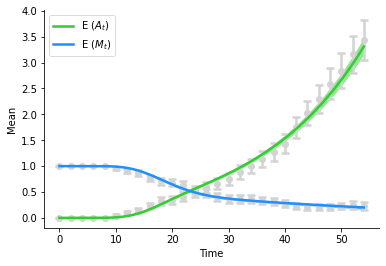

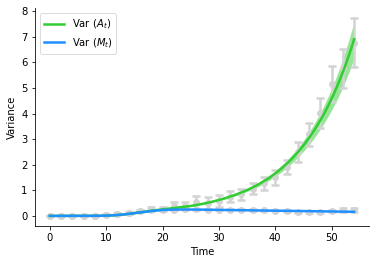

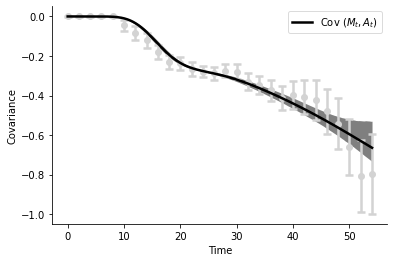

In [92]:
est = res_full_data[549]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF10_alphaS14_alphaT18_lambda8_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF10_alphaS14_alphaT18_lambda8_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par3_full_data_net_alphaF10_alphaS14_alphaT18_lambda8_cov.pdf')

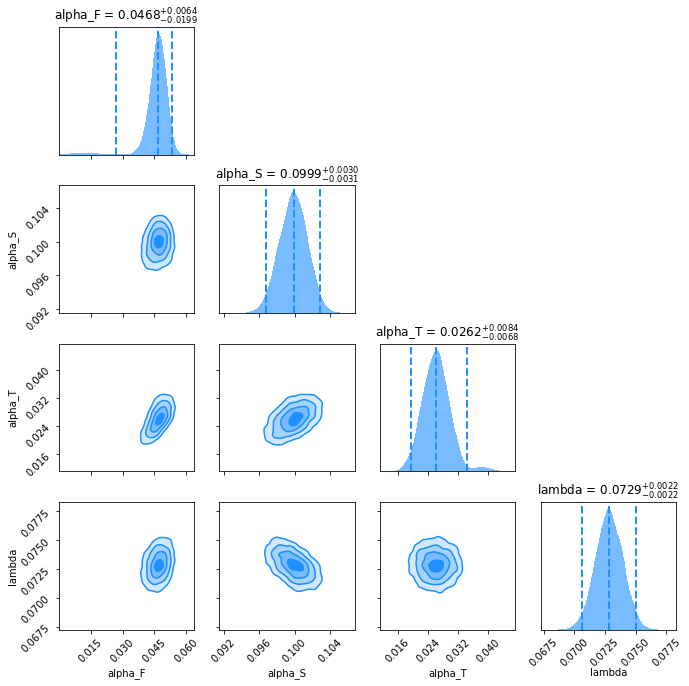

In [93]:
est = res_full_data[549]

me.plots.est_corner_kernel_plot(est, save='est_par3_full_data_net_alphaF10_alphaS14_alphaT18_lambda8_cornerkernel.pdf')

In [37]:
full_model_net_names == net_names

True

0.17693293555336875

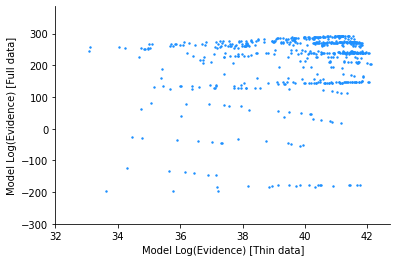

In [81]:
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.scatter(model_logevids, full_model_model_logevids, color='dodgerblue', s=2.0)
plt.xlabel('Model Log(Evidence) [Thin data]')
plt.ylabel('Model Log(Evidence) [Full data]')
plt.xlim((32, None))
plt.ylim((-300, None))
plt.savefig('./evidence_corr_thin_vs_full_data_par3_models.pdf')

np.corrcoef(model_logevids, full_model_model_logevids)[0, 1]


0.1204169152012141

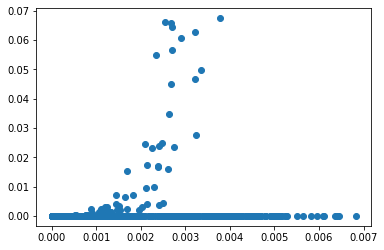

In [52]:
plt.scatter(model_probs, full_model_model_probs)
np.corrcoef(model_probs, full_model_model_probs)[0, 1]

(array([561.,   4.,   5.,   5.,   1.,   1.,   2.,   1.,   3.,   5.]),
 array([0.        , 0.00674974, 0.01349948, 0.02024922, 0.02699896,
        0.0337487 , 0.04049844, 0.04724818, 0.05399792, 0.06074766,
        0.0674974 ]),
 <a list of 10 Patch objects>)

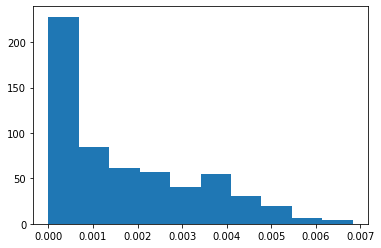

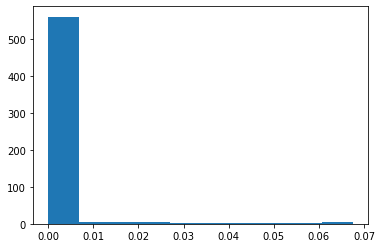

In [45]:
plt.figure()
plt.hist(model_probs)

plt.figure()
plt.hist(full_model_model_probs)

(array([  7.,   0.,   0.,   0.,   0.,   0.,   0.,  28.,  35., 518.]),
 array([-1559.75828647, -1374.44139885, -1189.12451122, -1003.80762359,
         -818.49073596,  -633.17384833,  -447.8569607 ,  -262.54007307,
          -77.22318544,   108.09370219,   293.41058982]),
 <a list of 10 Patch objects>)

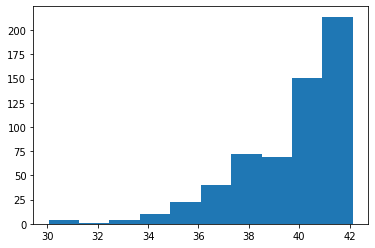

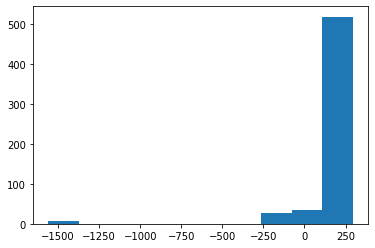

In [47]:
plt.figure()
plt.hist(model_logevids)

plt.figure()
plt.hist(full_model_model_logevids)

588
True


/Users/m651s/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:186: RuntimeWarning: overflow encountered in exp
  bayesf = np.exp(logevidbest - logevids)


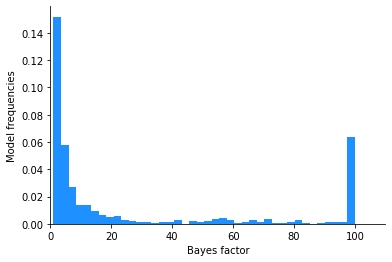

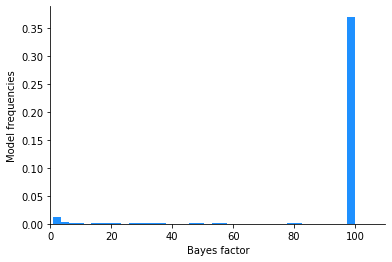

In [82]:
print(len(res))
print(len(res)==len(res_full_data))

bf = me.selection.compute_model_bayes_factors(res)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 110))
plt.hist(bf, bins=40, density=True, color='dodgerblue')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('./bayesfactors_thin_data_par3_models.pdf')

bf = me.selection.compute_model_bayes_factors(res_full_data)
bf[bf > 100.0] = 100.0
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xlim((0, 110))
plt.hist(bf, bins=40, density=True, color='dodgerblue')
plt.xlabel('Bayes factor')
plt.ylabel('Model frequencies')
plt.savefig('./bayesfactors_full_data_par3_models.pdf')

In [99]:
### load in silico estimation with pickle
res_1plusi = pickle.load(open('estimation_count_data_cd44_filtered_thin4_par1+i.pickle', 'rb')) # in_silico_estimation
# print(res)

net_names_1plusi = [est.net.net_name for est in res_1plusi]
model_probs_1plusi = me.selection.compute_model_probabilities(res_1plusi)
model_bfs_1plusi = me.selection.compute_model_bayes_factors(res_1plusi)
model_logevids_1plusi = [est.bay_est_log_evidence for est in res_1plusi]

In [100]:
model_logevids_1plusi

[31.5710683534454,
 35.632683563608815,
 36.92011348008265,
 37.501218295324065,
 37.83729571408179,
 38.19767668819837,
 38.37914098541798,
 35.94907012811707,
 39.112854585934755,
 39.860244697174025,
 40.25728726582936,
 40.35727338393802,
 40.57683357486161,
 40.61380790279041,
 36.704578546568534,
 39.35707661414869,
 40.04064616961045,
 40.141826356075725,
 40.53185125868625,
 40.43440839730646,
 40.49793687159961,
 36.913003603775955,
 39.20921490261244,
 39.763964453543636,
 40.12509618072463,
 40.18301654374779,
 40.218238523453756,
 40.14258970755334,
 36.7457491694761,
 39.253817649806756,
 39.52307300011537,
 39.71852595148961,
 39.88371224591806,
 40.0110200070305,
 39.732809033509,
 36.726057122428,
 38.94371554497594,
 39.39332394628561,
 39.49648873120336,
 39.36884692149565,
 39.280390273069315,
 39.38622826684621,
 36.784226173098624,
 38.87749839752808,
 39.34252787891213,
 39.23103728568773,
 39.16254365945645,
 39.07483848207364,
 39.01593768635132]

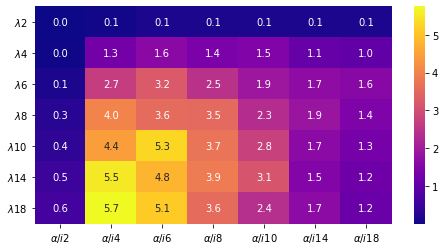

In [109]:
steps_list = [2, 4, 6, 8, 10, 14, 18]

rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha/i{i}$' for i in steps_list]

model_probs_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names_1plusi.index(name)
        model_probs_2d[i, j] = model_probs_1plusi[net_index]

df = pd.DataFrame(model_probs_2d * 100.0, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./prob_map_par1+i_thin4_data.pdf')

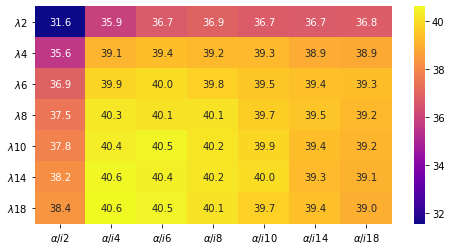

In [111]:
rows = [fr'$\lambda{i}$' for i in steps_list]
cols = [fr'$\alpha/i{i}$' for i in steps_list]

model_logevids_2d = np.zeros((len(rows), len(cols)))

for i, row_step in enumerate(rows):
    for j, col_step in enumerate(cols):
        name = f'net_{steps_list[j]}_{steps_list[i]}'
        net_index = net_names_1plusi.index(name)
        model_logevids_2d[i, j] = model_logevids_1plusi[net_index]

df = pd.DataFrame(model_logevids_2d, index=rows, columns=cols)

plt.figure(figsize=(8, 4))
sns.heatmap(df, cmap='plasma', annot=True, fmt='.1f') # annot=True
plt.yticks(rotation=0, va='center')
plt.savefig('./logevid_map_par1+i_thin4_data.pdf')

In [103]:
print(model_logevids_1plusi.index(max(model_logevids_1plusi)))
max(model_logevids_1plusi)

13


40.61380790279041

In [104]:
net_names_1plusi.index('net_4_18')

13

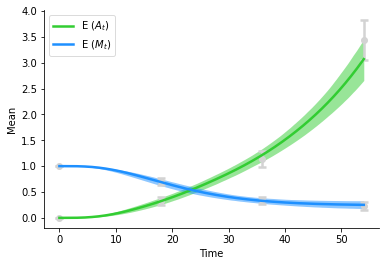

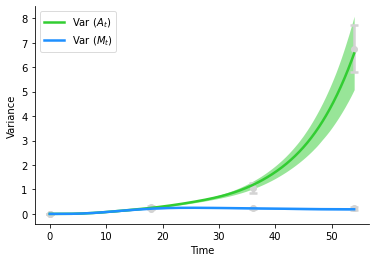

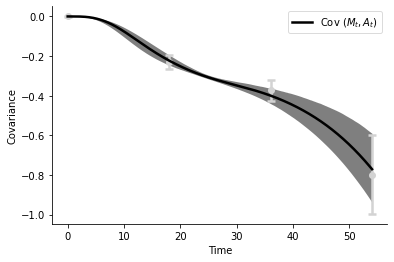

In [105]:
est = res_1plusi[13]

settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_mean_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_mean.pdf')

settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.est_bestfit_variance_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_var.pdf')

settings = {
    ('A_t', 'M_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.est_bestfit_covariance_plot(est, data=True, conf=True, settings=settings, save='est_par1+i_thin4_data_net_4_18_cov.pdf')

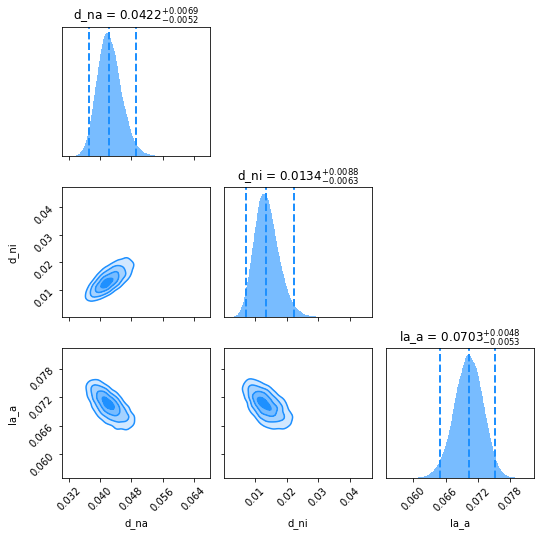

In [106]:
est = res_1plusi[13]

me.plots.est_corner_kernel_plot(est, save='est_par1+i_thin4_data_net_4_18_cornerkernel.pdf')

In [112]:
res_best_of = [res_min[19], res[405], res_1plusi[13]]
print(me.selection.compute_model_probabilities(res_best_of))
print(me.selection.compute_model_bayes_factors(res_best_of))
[(est.bay_est_log_evidence, est.bay_est_log_evidence_error) for est in res_best_of]

[0.08234955 0.74308518 0.17456527]
[9.0235483  1.         4.25677567]


[(39.862482254002536, 0.11058761305265391),
 (42.06231989177437, 0.11924196619722403),
 (40.61380790279041, 0.1304595397741054)]

#### F Various notes 2

In [181]:
# calculation of sigma correction
import math

p = 0.999 # 4.0/5.0 # 0.95
N = 45 # 5.0 # 44.0
print(p, N)

exp = p
var = p * (1-p)
print(exp, var)

mu4 = (1-p) * p**4 + p * (1-p)**4
sigma4 = var*var
print(mu4, sigma4)

0.999 45
0.999 0.000999000000000001
0.000996005997000001 9.98001000000002e-07


In [182]:
se_sample_mean = math.sqrt(var/N)
print(se_sample_mean)

se_sample_var = math.sqrt((1/N) * (mu4 - ((N-3)/(N-1)) * sigma4))
print(se_sample_var)

se_sample_cov = math.sqrt( ((N-1)**2/(N**3)) * (mu4 - sigma4)   +   ((N-1)/(N**3)) * 2 * sigma4 )
print(se_sample_cov)

se_sample_cov_corr = math.sqrt( (N/(N-1))**2 * (  ((N-1)**2/(N**3)) * (mu4 - sigma4)   +   ((N-1)/(N**3)) * 2 * sigma4 ) )
print(se_sample_cov_corr)

0.004711687595755901
0.004702371410450073
0.004597874267995626
0.004702371410450072


(45, 2, 1)


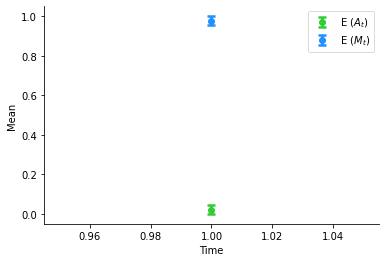

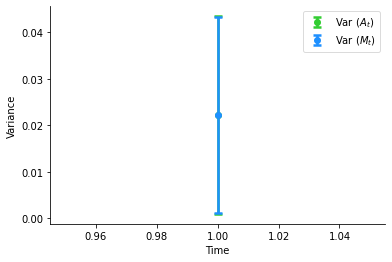

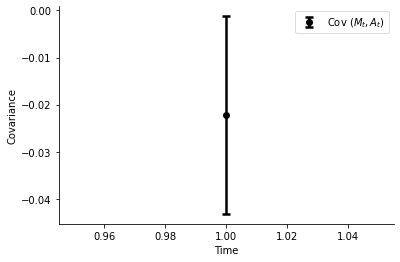

[[[0.02222222]
  [0.97777778]]

 [[0.02214427]
  [0.02217209]]]
[[[0.02222222]
  [0.02222222]]

 [[0.02124496]
  [0.02103521]]]
[[[-0.02222222]]

 [[ 0.02097986]]]


In [180]:
N = 45
sigma_counts = np.zeros((N, 2, 1))

# add N-1 "normal wells"
for i in range(N-1):
    sigma_counts[i, :, 0] = np.array([0.0, 1.0])

# add Nth well with switched cell types
sigma_counts[N-1, :, 0] = np.array([1.0, 0.0])

# # add also second to last switched
# sigma_counts[N-2, :, 0] = np.array([1.0, 0.0])

print(sigma_counts.shape)
# print(sigma_counts)

### creation of a new data object
data_name = 'bootstrap_sigma'

data_input = {
    # general settings
    'variables': ['A_t', 'M_t'], # indices here are matched to indices of data
    'data_type': 'counts', # 'summary' or 'counts'
    
    # time points
    'time_values': np.array([1.0]), # shape (# time_values, )
    
    # if data_type 'summary'
    'mean_data': np.array([]), # shape (2, # variables, # time_values)
    'var_data': np.array([]), # variance, shape (2, # variables, # time_values)
    'cov_data': np.array([]), # covariance, shape (2, # variables, # time_values)
    
    # if data_type 'counts'
    'count_data': sigma_counts, # shape (# number of simulations, # variables, # time_values)
    'bootstrap_samples': 10000, # 100000
    
    # handling of standard errors that are zero
    # all standard errors <= basic_sigma, will be set to basic_sigma
    'basic_sigma': 0.0 # 0.01, 0.001
}

data = me.Data(data_name)
data.load(data_input)

### plotting
# mean
settings = {
    'A_t': {'label': 'E $(A_t)$', 'color': 'limegreen'},
    'M_t': {'label': 'E $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_mean_plot(data, settings=settings)

# var
settings = {
    ('A_t', 'A_t'): {'label': 'Var $(A_t)$', 'color': 'limegreen'},
    ('M_t', 'M_t'): {'label': 'Var $(M_t)$', 'color': 'dodgerblue'}
}
me.plots.data_variance_plot(data, settings=settings)

# cov
settings = {
    ('M_t', 'A_t'): {'label': 'Cov $(M_t, A_t)$', 'color': 'black'}
}
me.plots.data_covariance_plot(data, settings=settings)

print(data.data_mean)
print(data.data_variance)
print(data.data_covariance)

In [138]:
in_silico_counts

array([[[ 0.,  0.,  0., ..., 21., 25., 28.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 16., 18., 21.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  4.,  5.,  6.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 11., 12., 14.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  7.,  7.,  7.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  9., 11., 13.],
        [ 1.,  1.,  1., ...,  0.,  0.,  0.]]])